# Image Processing With Machine Learning
Date: 18 December 2019
<br> Course: Convolutional Neural Netwroks for Image Processing 
<br> link: https://www.datacamp.com/courses/convolutional-neural-networks-for-image-processing


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import IPython as IP
import keras
from keras.utils import to_categorical

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> شبکه ی عصبی ما حرفه ای تر میشه اگه که ما مفهوم کانولوشن رو توش بیاریم. ولی خب چرا؟ مگه کانولوشن چیه و چیکار می کنه؟
            <br> در شبکه عصبی هایی که ما تا به حال برای خودمون درست میکردیم، هر نورون در لایه اول به طور جداکانه به همه ی  پیکسل های تصویر وزن می داشت و هیچ ارتباطی ما بین پیکسل ها نداشتیم یعنی هیچ تمایزی قائل نبودیم
            <br> ولی خب میدونیم که اینطوری نیست و بین پیکسل ها ارتباط وجود داره. مثلا همه ی پیکسل هایی که در یک لبه در تصویر هستند به هم ارتباط دارند. وقتی میگیم که ارتباط دارند منظورمون اینه که کورلیشن دارند
            <br> کانولوشن یه ابزار بسیار قوی ریاضی هست که می تونه این کورلیشن ها رو در بین پیکسل ها برامون استخراج کنه بنابراین کانولوشن ابزاری است که سی ان ان برای پردازش تصاویر ازون استفاده میکنه
            <br>
            <br> حالا بذار یه کم از قدرت کانولوشن برات بگم
            <br>
            <br> اول بذار کانولوشن رو در یک بعد برات مثال بزنم: اینجا من یه آرایه ی یک بعدی رو در نظر میگیرم که پنج تا صفر داره و پنج تا یک. بنابراین در المان پنجم یک لبه ی بالارونده داره. لبه ای که از صفر میره به یک
            <br> برای تشخیص این لبه با استفاده از کانولوشن به یه کرنل احتیاج داریم که این ویژگی رو بتونه داشته باشه پس یه کرنل به طول دو کفایت می کنه که مقدار اولش -1 و مقدار دومش 1 باشه. یعنی از -1 به 1 یعنی یه لبه ی بالارونده
        </b>
    </font>
</div>

In [12]:
x = np.array([0,0,0,0,0,1,1,1,1,1])
kernel = np.array([-1, 1])
conv = np.array([0,0,0,0,0,0,0,0,0,0])

for ii in range(8):
    conv[ii] = (kernel*x[ii:ii+2]).sum()
print(conv)

[0 0 0 0 1 0 0 0 0 0]


<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> می بینی چه با حال؟ لبه رو تشخیص داد. حالا اگه لبه بالا رونده باشه چی؟
        </b>
    </font>
    </div>

In [17]:
y = np.array([0,0,1,1,0,0,1,1,0,0])
conv_y = np.array([0,0,0,0,0,0,0,0,0,0])

for jj in range(8):
    conv_y[jj] = (kernel*y[jj:jj+2]).sum()
conv_y

array([ 0,  1,  0, -1,  0,  1,  0, -1,  0,  0])

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> دیدی چه باحال؟ اونا رو هم تشخیص داد. با علامت منفی
            <br> حالا برای تصویر چطوریه؟ برای تصویر کانولوشن دو بعدیه و کرنل هم دو بعدیه. در تصویر زیر در سمت چپ، تصویر یک لباس نشون داده شده که ما می خوایم لبه هاش رو شناسایی کنیم و در وسط، تصویر کرنل دو بعدی نشون داده شده است که می تونه لبه های چپ به راست رو تشخیص بده و در سمت راست حاصل اعمال اون کرنل بر اون تصویر نشون داده شده است.  
        </b>
    </font>
    </div>

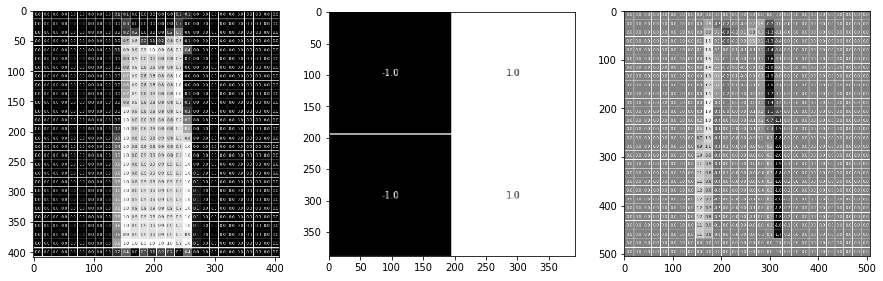

In [21]:
dress = plt.imread('photos/dress.png')
kernel_img = plt.imread('photos/kernel_edge.png')
dress_conved = plt.imread('photos/dress_conved.png')
fig, axiso = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axiso[0].imshow(dress)
axiso[1].imshow(kernel_img)
axiso[2].imshow(dress_conved)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> همونطور که میبینیم لبه های چپ به راست رو تشخیص داده و لبه های راست به چپ رو هم با علامت برعکس تشخیص داده
            <br> کانولوشن توی لبه ی چپ مثبت به دست اومده و توی لبه ی راست منفی
            <br> حالا بذار روی یه تصویر خودم کانولوشن بزنم برای تشخیص لبه
            <br> برای اینکار از داده های موجود در کراس یعنی داده ی خیلی معروف ام نیست استفاده می کنیم
        </b>
    </font>

In [24]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 80s 7us/step


In [25]:
x_train.shape

(60000, 28, 28)

In [52]:
sample_image = x_train[7,:,:]
conv_img = np.zeros((27,27),dtype='uint8')
kernel_2d = np.array([[-1,1],[-1,1]])
for i in range(27):
    for j in range(27):
        window = sample_image[i:i+2,j:j+2]
        conv_img[i,j] = (kernel_2d*window).sum()

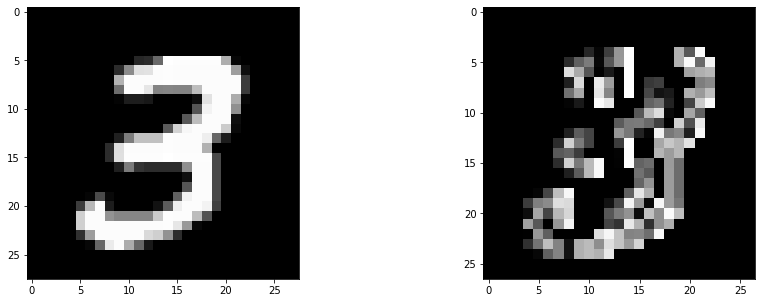

In [53]:
fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
plt.gray()
ax1[0].imshow(sample_image)
ax1[1].imshow(conv_img)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> که البته مشخصه که این تصویر مثال خوبی برای این کار نیست
            <br> به این چیزی که در نهایت بعد از کانولوشن به دست میاد میگیم فیچر مپ. چون درواقع یه مپ ازون فیچری رو بهمون میده که اون کرنل برای استخراجش طراحی شده
        </b>
    </font>

# Convolution in Neural Netwroks

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> ازونجا که کانولوشن خیلی ابزار قدرتمندی هست اساتید به این فکر افتاده اند که اون رو وارد شبکه عصبی کنیم به این صورت که یه لایه داریم که کانولوشن انجام می ده و در کراس چنین لایه ای از قبل دیزاین شده
        </b>
    </font>
    </div>
    <div align = 'center'>
    <font size=3>
            <br> from keras.layers import Conv2D
    </font>
    </div>
    <div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> و بعد میفرسته با لایه ی بعدی که به قولی فولی کانکتد هست و از همون جنس دِنس در کراس می باشد
            <br> سوال اینه که اگه قراره که کانولوشون انجام بده پس این وسط چی میخواد ترین بشه؟ 
            <br> آفرین بر تو. سوال بسیار زیبایی بود. در واقع این کانولوشن یه کرنل داره و در حین ترینینگ، این کرنل هست که 
ترین میشه تا ما به یه کرنل بسیار عالی برای کانولوشن برسیم که بتونه اون ویژگی ای که ما می خوایم رو یاد بگیره
            <br>
            <br> حالا بذار ببینیم که این لایه ی کانولوشن چطور کار می کنه؟
            <br> این لایه شبیه لایه ی دِنس عمل میکنه ولی خب به جای اینکه هر نورون (یا یونیت) به همه ی نورون های لایه قبل متصل باشه، اینجا نورون به لایه ی قبلی به واسطه ی یک کانولوشن کرنل وصل میشه
           <br> بدین ترتیب خروجی یه نورون درواقع کانولوشن اون کرنل با اون تصویر ورودی هست
            <br> من در اینجا اومدم دو تا شکل برات کشیدم. 
            <br> سمت چپ یه لایه ورودی و یه لایه ی دِنس رو نشون میده
            <br> سمت راست یه لایه ی ورودی و یه لایه ی کانولوشن رو نشون میده
            <br> من کلی وقت گذاشتم تا تفاوت لایه ی دِنس و لایه ی کانولوشن رو بفهمم و الآن به طور لیست وار برات تفاوت ها رو میگم که به شدت بهت کمک میکنه که بتونی درک کنی

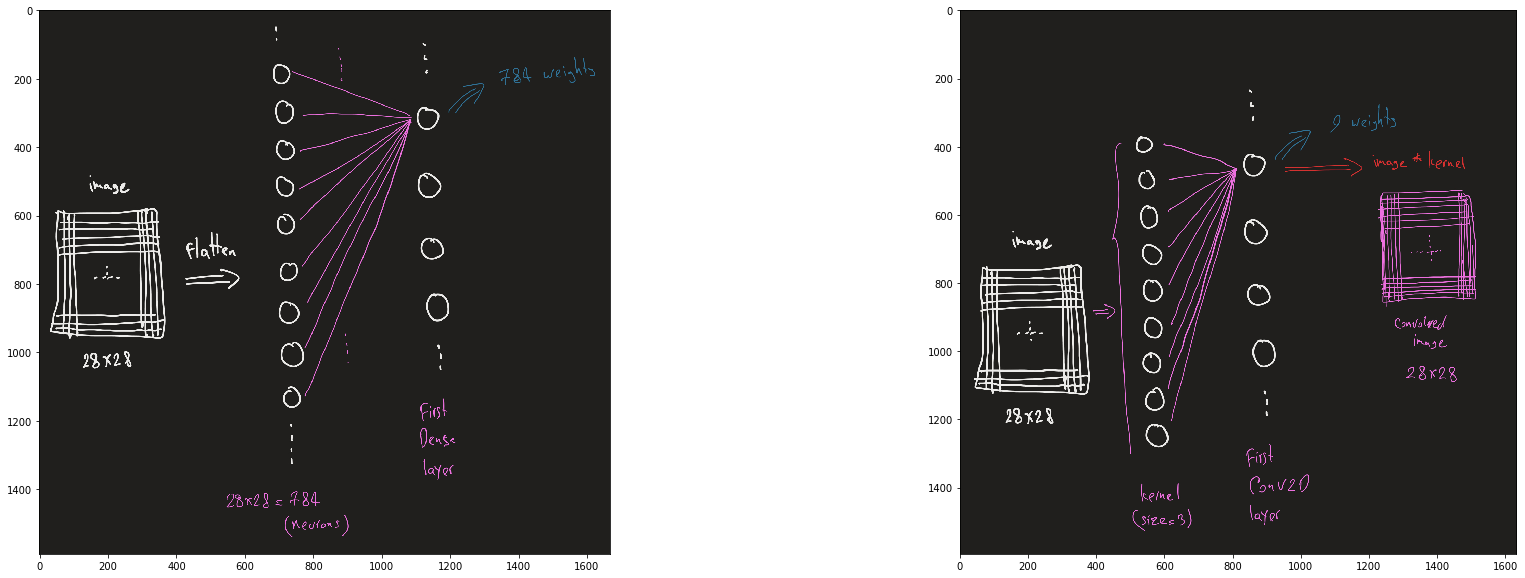

In [4]:
dense_diagram = plt.imread('photos\Dense.jpg')
conv2d_diagram = plt.imread('photos\Conv2D.jpg')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
ax[0].imshow(dense_diagram)
ax[1].imshow(conv2d_diagram)

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> نکته اول: وقتی لایه اولت دِنس هست باید ورودی رو به صورت یه بردار از پیکسل ها بدی به شبکه ولی وقتی لایهی اولت کانولوشن هست، چون میخواد کانولوشن دو بعدی حساب کنه باید تصویر رو به صورت همون تصویر یعنی به شبکه بدی
            <br>
            <br> نکته ی دوم: در سمت راست یعنی یه لایه ی کانولوشن، در واقع ما دو تا لایه داریم که از بیرون اون دو تا رو روی هم یه لایه در نظر میگیریم. ولی اگه بخوای دقیق بگی یه لایه  همون لایه ی کانو هست و یه لایه هم کرنل هست که خب بسته با سایز کرنل تعداد نورون ها متغیر هست. برای یه کرنل با سایز 3 تعداد نورون ها در (زیر) لایه ی کرنل برابر با 9 نورون هست
            <br>
            <br> نکته ی سوم: بنابراین حالا که اینو فهمیدی تفاوت اصلی رو می تونم بهن بگم. هر لنورون در لایه ی دِنس به تعداد پیکسل های تصویر ورودی وزن داره (در این مثال میشه 784تا) ولی در لایه ی کانو، هر نورون به تعداد پارامترهای کرنل وزن داره یعنی در این مثال 9 تا و میبینی که یه کاهش بسیار شدید در تعداد وزن ها هست
            <br> نکته ی جالب اینه که خود عمل کانولوشن با شبکه ی عصبی انجام نمیشه و یعنی اینکه عمل بک پروپگیشن در کانولوشن دخلی نداره و احتمالا کانو خارج از ساختار شبکه توسط یه کدی اعمال میشه و چیزی که اینجا ترین میشه همون وزنهایی است که از یه نورون به کرنل میره که در واقع اینها همون عدد های کرنل هستند. و حیرت انگیز اینه که ما داریم به دنبال یه کرنل خوب میگردیم. از همون اول نمی دونیم چه فیچری توی تصویر هست که بشینیم بر اساس اون یه کرنل بنویسیم. از این طریق هزاران هزار کرنل رو امتحان میکنیم تا ببینیم کدوم خوبه؟
            <br>
            <br> نکته ی چهارم: در لایه ی دنس خروجی هر نورون یه عدده ولی در لایه ی کانو خروجی هر نورون یه تصویره که با حاصل کاولوشنه یه کرنل با تصویر ورودیه. وقتی که شما ده تا نورون توی لایه ی کانو داری یعنی هر لایه با یه سری وزنی داره کانولوشن حساب میکنه و یعنی شما توی هر بار اصطلاخا فوروارد پروپگیشن داری ده تا کرنل رو روی تصویر تست می کنی
            <br>
            <br> نکته ی پنجم: خب حالا که خراب شد که. اینطوری که هر نورون خروجی شا یه تصویر هست برای ادامه چیکار کنیم؟ آفرین. سوال خوبیه. بعد از هر لایه ی کانو باید یه لایه ی فلتن بذاری تا خروجی هر نورون رو که الآن تصویر هست رو تبدیل کنه به یه بردار برای ادامه ی کار شبکه
            <br>
            <br> نکته ی زیر رو که گل سرسبد این نکته ها هست رو می خوام دقیقا همونطوری که زبان اینستراکتور کورس شنیدم برات بنویسم

A dense layer has one weight for each pixel in image but a convolution layer has only one wieght for each pixel in the kernel

<div align = 'right'>
    <font size=3, style='font-family:B Nazanin'>
        <b>
            <br> حالا همون مساله ی قبلی با داده های سیفار رو اینجا سعی می کنیم با یه مدل جدید اعمال کنیم
        </b>
    </font>
    </div>
          

In [11]:
# A function offered by the website itself to read the data batches
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

batch_training_01 = unpickle('cifar-10-batches-py/data_batch_1')
batch_test = unpickle('cifar-10-batches-py/test_batch')
batch01_data = batch_training_01.pop(b'data')
batch01_label = batch_training_01.pop(b'labels')

train_input = batch01_data[0:5000,0:1024]
train_output = batch01_label[0:5000]
test_input = batch01_data[6000:6500,0:1024]
test_output = batch01_label[6000:6500]

train_data = train_input.reshape(5000,32,32,1)
test_data = test_input.reshape(500,32,32,1)

train_output_ohe = to_categorical(train_output)
test_output_ohe = to_categorical(test_output)

In [7]:
test_data.shape

(500, 32, 32)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

shah_classifier3 = Sequential()
shah_classifier3.add(Conv2D(20, kernel_size=3, activation='relu', input_shape=(32,32,1)))
shah_classifier3.add(Flatten())
shah_classifier3.add(Dense(10, activation='softmax'))

shah_classifier3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

shah_classifier3.fit(train_data, train_output_ohe, epochs=20, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
4000/4000 [==============================] - 5s 1ms/step - loss: 14.5729 - acc: 0.0958 - val_loss: 14.4740 - val_acc: 0.1020
Epoch 2/20
4000/4000 [==============================] - 3s 873us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4740 - val_acc: 0.1020
Epoch 3/20
4000/4000 [==============================] - 3s 867us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4740 - val_acc: 0.1020
Epoch 4/20
4000/4000 [==============================] - 4s 894us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4740 - val_acc: 0.1020
Epoch 5/20
4000/4000 [==============================] - 3s 863us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4740 - val_acc: 0.1020
Epoch 6/20
4000/4000 [==============================] - 3s 865us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4740 - val_acc: 0.1020
Epoch 7/20
4000/4000 [==============================] - 4s 875us/step - loss: 14.5708 - acc: 0.0960 - val_loss: 14.4740 - val_

In [14]:
shah_classifier3.evaluate(test_data, test_output_ohe)

500/500 [==============================] - 0s 498us/step


[14.280632431030273, 0.11400000047683716]

In [16]:
shah_classifier3.save('saved_models\shah_classifier3.h5')

In [17]:
unseen_d = test_input[:5,0:1024]
unseen_data_label = test_output_ohe[:5]
unseen_data = unseen_d.reshape(5,32,32,1)

In [18]:
prediction = shah_classifier3.predict(unseen_data)
correct_prediction = (prediction*unseen_data_label).sum()
print(correct_prediction)

0.0
